# Pipeline

We are now looking into the use of `Pipeline`s

In [2]:
%load_ext autoreload
%autoreload 2
    
import numpy as np
from matplotlib import pyplot as plt
from pydatatom import *

%matplotlib ipympl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
dataset = GzipPickleDataset("/tmp/AA_clock_spect")
len(dataset)

2470

In [6]:
pipeline = Pipeline(steps=[
    TransformStep(PickKey("image")),
    ImageMeanStep(),
    AtomCropStep(atom_num=16),
    AtomCountStep(),
])

data = pipeline.run(dataset)

KeyError: 'imstats_mean'

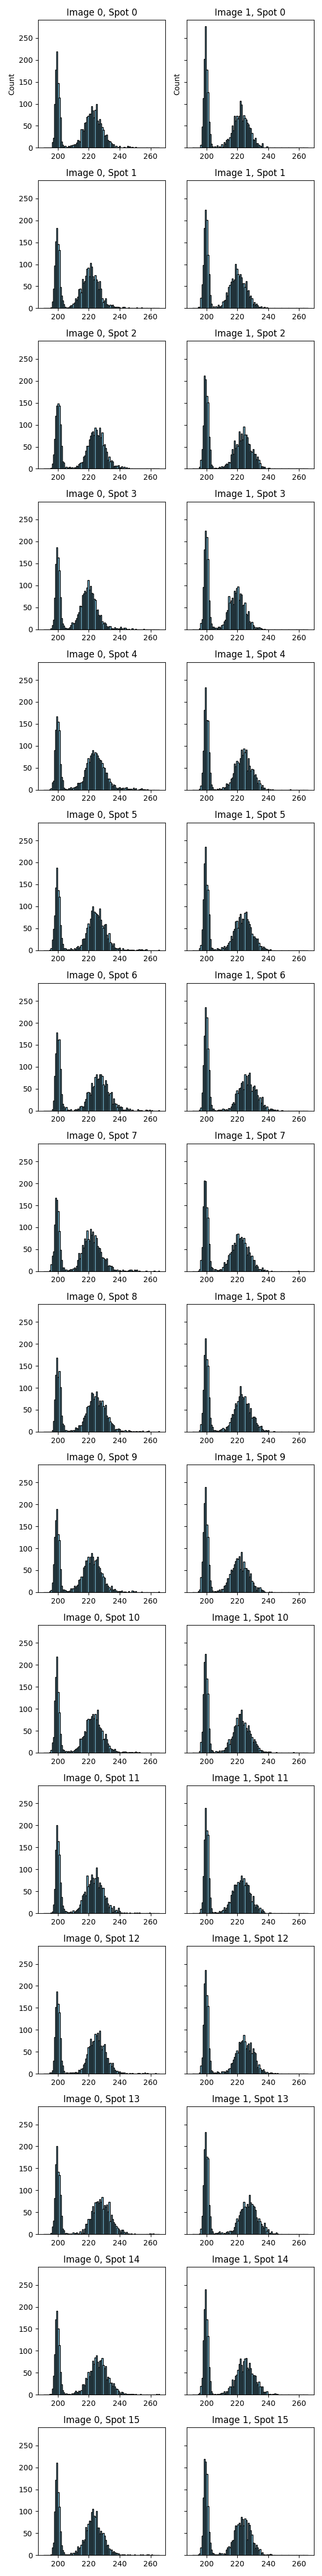

In [37]:
pipeline.plot_step(3)

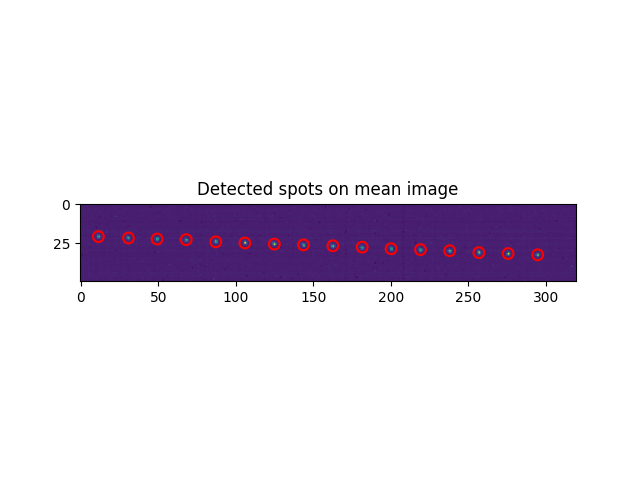

In [14]:
pipeline.plot_step(2)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

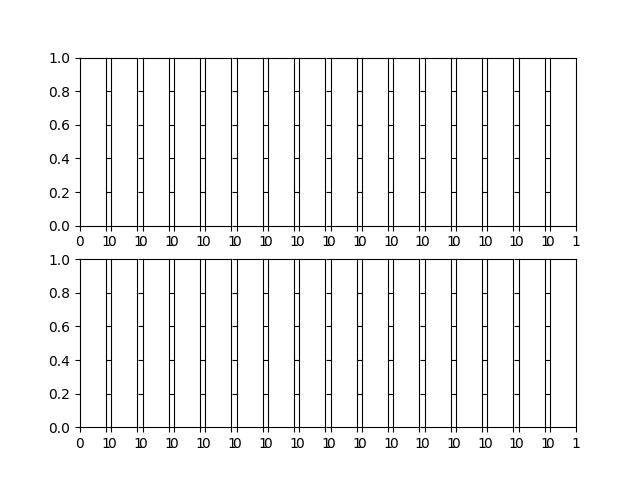

In [17]:
pipeline.plot_step(3)

In [22]:
vmin = vmax = count = 0

In [24]:
vmin +=1

In [27]:
vmin

1

In [19]:
data[0].mean(axis=(2,3)).shape

(2, 16)

In [20]:
data[0].mean(axis=(2,3))

array([[226.11111111, 210.44444444, 198.88888889, 230.77777778,
        217.44444444, 229.88888889, 221.88888889, 221.66666667,
        221.55555556, 199.        , 227.33333333, 219.22222222,
        219.22222222, 218.55555556, 200.11111111, 219.66666667],
       [226.22222222, 196.88888889, 201.77777778, 222.77777778,
        229.88888889, 201.55555556, 227.55555556, 221.66666667,
        223.66666667, 197.44444444, 199.11111111, 228.22222222,
        221.22222222, 200.22222222, 198.55555556, 218.55555556]])

In [48]:
data.transform.points

array([[ 21,  11],
       [ 22,  31],
       [ 22,  49],
       [ 23,  68],
       [ 24,  87],
       [ 25, 106],
       [ 26, 125],
       [ 26, 144],
       [ 27, 163],
       [ 28, 182],
       [ 29, 200],
       [ 29, 219],
       [ 30, 238],
       [ 31, 257],
       [ 32, 276],
       [ 33, 295]])

In [49]:
data

In [50]:
data.dataset

In [51]:
data.transform

In [52]:
data.transform.points

array([[ 21,  11],
       [ 22,  31],
       [ 22,  49],
       [ 23,  68],
       [ 24,  87],
       [ 25, 106],
       [ 26, 125],
       [ 26, 144],
       [ 27, 163],
       [ 28, 182],
       [ 29, 200],
       [ 29, 219],
       [ 30, 238],
       [ 31, 257],
       [ 32, 276],
       [ 33, 295]])

In [53]:
data.dataset[0].shape

(2, 50, 320)

In [54]:
data.dataset[0]

array([[[199, 187, 203, ..., 204, 205, 196],
        [201, 201, 208, ..., 201, 204, 203],
        [197, 206, 200, ..., 203, 195, 199],
        ...,
        [202, 203, 201, ..., 200, 198, 200],
        [199, 197, 198, ..., 195, 205, 204],
        [205, 201, 199, ..., 208, 194, 196]],

       [[201, 198, 201, ..., 195, 199, 200],
        [197, 199, 201, ..., 203, 202, 206],
        [197, 210, 197, ..., 193, 203, 200],
        ...,
        [201, 203, 205, ..., 202, 192, 202],
        [202, 191, 198, ..., 204, 198, 197],
        [198, 201, 194, ..., 197, 198, 195]]], dtype=uint16)

In [68]:
data.transform(data.dataset[0])

array([[[[198, 223],
         [212, 246]],

        [[215, 231],
         [214, 244]]],


       [[[210, 209],
         [204, 271]],

        [[192, 202],
         [203, 196]]],


       [[[194, 195],
         [201, 192]],

        [[207, 195],
         [200, 199]]],


       [[[204, 221],
         [205, 279]],

        [[223, 206],
         [198, 243]]],


       [[[200, 221],
         [193, 243]],

        [[205, 232],
         [201, 248]]],


       [[[201, 255],
         [217, 268]],

        [[197, 212],
         [195, 209]]],


       [[[215, 264],
         [200, 267]],

        [[219, 223],
         [209, 276]]],


       [[[198, 202],
         [242, 267]],

        [[207, 206],
         [210, 292]]],


       [[[218, 234],
         [231, 304]],

        [[219, 210],
         [238, 285]]],


       [[[203, 201],
         [202, 198]],

        [[200, 197],
         [198, 200]]],


       [[[199, 260],
         [219, 238]],

        [[204, 202],
         [193, 193]]],


       [[[

In [59]:
image = data.dataset[0]

In [69]:
y0, x0 = data.transform.points[0]
y0, x0

(np.int64(21), np.int64(11))

In [70]:
size = 3

In [73]:
y1 = y0 - size//2
y1

np.int64(20)

In [78]:
y2 = y0 + size//2 + 1
y2

np.int64(23)

In [75]:
x1 = x0 - size//2
x1

np.int64(10)

In [79]:
x2 = x0 + size//2 + 1
x2

np.int64(13)

In [80]:
image[:, y1:y2, x1:x2]

array([[[198, 223, 236],
        [212, 246, 271],
        [198, 233, 218]],

       [[215, 231, 277],
        [214, 244, 227],
        [202, 204, 222]]], dtype=uint16)

In [61]:
m, h, w = image.shape

In [62]:
y1, y2 = y0 - h // 2, y0 + h // 2
y1, y2

(np.int64(-4), np.int64(46))

In [64]:
x1, x2 = x0 - w // 2, x0 + w // 2
x1, x2

(np.int64(-149), np.int64(171))